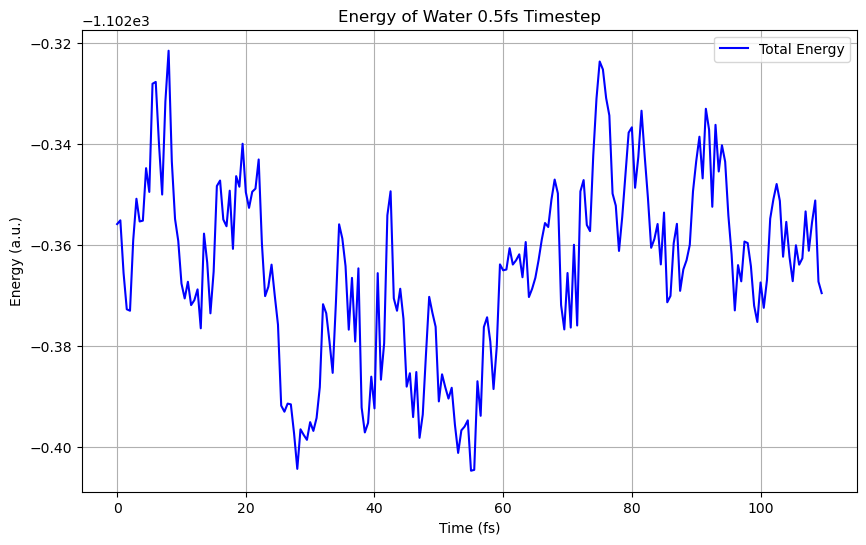

In [2]:
import matplotlib.pyplot as plt

# Define the path to the .ener file
ener_file = '../Runs/Water/water_aimd_1ns_every0.5fs-1.ener'

# Read the file
time = []
total_energy = []
kinetic_energy = []
potential_energy = []
temperature = []
pressure = []

# Read each line from the .ener file
with open(ener_file, 'r') as file:
    for line in file:
        # Skip comments
        if line.startswith('#'):
            continue
        
        # Split the line into values and append to lists
        data = line.split()
        time.append(float(data[1]))  # Time in ps
        #total_energy.append(float(data[1]))  # Total Energy in a.u.
        kinetic_energy.append(float(data[2]))  # Kinetic Energy in a.u.
        potential_energy.append(float(data[4]))  # Potential Energy in a.u.
        temperature.append(float(data[3]))  # Temperature in K
        total_energy.append(potential_energy[-1] + kinetic_energy[-1])

# Plot the Total Energy vs Time
plt.figure(figsize=(10,6))
plt.plot(time, total_energy, label='Total Energy', color='blue')
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
plt.title('Energy of Water 0.5fs Timestep')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define the path to the .ener file
ener_file = '../Runs/Water/water_aimd_1ns_every0.5fs-1.ener'

# Read the file
time = []
total_energy = []
kinetic_energy = []
potential_energy = []
temperature = []
pressure = []

# Read each line from the .ener file
with open(ener_file, 'r') as file:
    for line in file:
        # Skip comments
        if line.startswith('#'):
            continue
        
        # Split the line into values and append to lists
        data = line.split()
        time.append(float(data[1]))  # Time in ps
        #total_energy.append(float(data[1]))  # Total Energy in a.u.
        kinetic_energy.append(float(data[2]))  # Kinetic Energy in a.u.
        potential_energy.append(float(data[4]))  # Potential Energy in a.u.
        temperature.append(float(data[3]))  # Temperature in K
        total_energy.append(potential_energy[-1] + kinetic_energy[-1])

# Plot the Total Energy vs Time
plt.figure(figsize=(10,6))
plt.plot(time, total_energy, label='Total Energy', color='blue')
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
plt.title('Energy of Water 0.5fs Timestep')
plt.legend()
plt.grid(True)
plt.show()
